In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from warnings import filterwarnings
filterwarnings('ignore')

# Loading the Dataset and Data Auditing

In [99]:
df = pd.read_csv('/content/diabetic_data.csv')  # Load the dataset

# --- Styling ---
style = """
<style>
.pretty-table {
  border-collapse: collapse;
  width: 430px;
  font-size: 15px;
  margin-bottom: 32px;
}
.pretty-table th, .pretty-table td {
  border: 1px solid #bbb;
  padding: 7px 12px;
  text-align: left;
}
.pretty-table th {
  background: #2e86c1;
  color: #fff;
  font-weight: bold;
  letter-spacing: 0.5px;
}
.pretty-table tr:nth-child(even) {
  background: #f4f8fb;
}
.pretty-table tr:nth-child(odd) {
  background: #e9f2fa;
}
.section-title {
  color: #21618c;
  font-size: 20px;
  font-weight: bold;
  margin: 22px 0 8px 0;
  letter-spacing: 0.5px;
  font-family: sans-serif;
}
</style>
"""

# --- Main Data Type Table ---
dtype_df = pd.DataFrame({
    "Column": df.columns,
    "Data Type": [df[col].dtype for col in df.columns]
})
dtype_html = dtype_df.to_html(index=False, classes="pretty-table")

# --- Show dataset shape ---
num_rows, num_cols = df.shape
shape_html = f"""
<div style="font-size:16px; margin-bottom:12px;">
    <b>Dataset Shape:</b> {num_rows:,} rows × {num_cols:,} columns
</div>
"""
dtype_section = "<div class='section-title' style='margin-top:0;'>Column Names & Data Types</div>"

# --- Lookup tables from your screenshots ---
admission_type_html = """
<div class='section-title'>Admission Type ID Mapping</div>
<table class="pretty-table">
<tr><th>admission_type_id</th><th>description</th></tr>
<tr><td>1</td><td>Emergency</td></tr>
<tr><td>2</td><td>Urgent</td></tr>
<tr><td>3</td><td>Elective</td></tr>
<tr><td>4</td><td>Newborn</td></tr>
<tr><td>5</td><td>Not Available</td></tr>
<tr><td>6</td><td>NULL</td></tr>
<tr><td>7</td><td>Trauma Center</td></tr>
<tr><td>8</td><td>Not Mapped</td></tr>
</table>
"""

discharge_disposition_html = """
<div class='section-title'>Discharge Disposition ID Mapping</div>
<table class="pretty-table" style="width: 700px">
<tr><th>discharge_disposition_id</th><th>description</th></tr>
<tr><td>1</td><td>Discharged to home</td></tr>
<tr><td>2</td><td>Discharged/transferred to another short term hospital</td></tr>
<tr><td>3</td><td>Discharged/transferred to SNF</td></tr>
<tr><td>4</td><td>Discharged/transferred to ICF</td></tr>
<tr><td>5</td><td>Discharged/transferred to another type of inpatient care institution</td></tr>
<tr><td>6</td><td>Discharged/transferred to home with home health service</td></tr>
<tr><td>7</td><td>Left AMA</td></tr>
<tr><td>8</td><td>Discharged/transferred to home under care of Home IV provider</td></tr>
<tr><td>9</td><td>Admitted as an inpatient to this hospital</td></tr>
<tr><td>10</td><td>Neonate discharged to another hospital for neonatal aftercare</td></tr>
<tr><td>11</td><td>Expired</td></tr>
<tr><td>12</td><td>Still patient or expected to return for outpatient services</td></tr>
<tr><td>13</td><td>Hospice / home</td></tr>
<tr><td>14</td><td>Hospice / medical facility</td></tr>
<tr><td>15</td><td>Discharged/transferred within this institution to Medicare approved swing bed</td></tr>
<tr><td>16</td><td>Discharged/transferred/referred another institution for outpatient services</td></tr>
<tr><td>17</td><td>Discharged/transferred/referred to this institution for outpatient services</td></tr>
<tr><td>18</td><td>NULL</td></tr>
<tr><td>19</td><td>Expired at home. Medicaid only, hospice.</td></tr>
<tr><td>20</td><td>Expired in a medical facility. Medicaid only, hospice.</td></tr>
<tr><td>21</td><td>Expired, place unknown. Medicaid only, hospice.</td></tr>
<tr><td>22</td><td>Discharged/transferred to another rehab fac including rehab units of a hospital.</td></tr>
<tr><td>23</td><td>Discharged/transferred to a long term care hospital.</td></tr>
<tr><td>24</td><td>Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.</td></tr>
<tr><td>25</td><td>Not Mapped</td></tr>
<tr><td>26</td><td>Unknown/Invalid</td></tr>
<tr><td>30</td><td>Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere</td></tr>
<tr><td>27</td><td>Discharged/transferred to a federal health care facility.</td></tr>
<tr><td>28</td><td>Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital</td></tr>
<tr><td>29</td><td>Discharged/transferred to a Critical Access Hospital (CAH).</td></tr>
</table>
"""

admission_source_html = """
<div class='section-title'>Admission Source ID Mapping</div>
<table class="pretty-table" style="width: 600px">
<tr><th>admission_source_id</th><th>description</th></tr>
<tr><td>1</td><td>Physician Referral</td></tr>
<tr><td>2</td><td>Clinic Referral</td></tr>
<tr><td>3</td><td>HMO Referral</td></tr>
<tr><td>4</td><td>Transfer from a hospital</td></tr>
<tr><td>5</td><td>Transfer from a Skilled Nursing Facility (SNF)</td></tr>
<tr><td>6</td><td>Transfer from another health care facility</td></tr>
<tr><td>7</td><td>Emergency Room</td></tr>
<tr><td>8</td><td>Court/Law Enforcement</td></tr>
<tr><td>9</td><td>Not Available</td></tr>
<tr><td>10</td><td>Transfer from critical access hospital</td></tr>
<tr><td>11</td><td>Normal Delivery</td></tr>
<tr><td>12</td><td>Premature Delivery</td></tr>
<tr><td>13</td><td>Sick Baby</td></tr>
<tr><td>14</td><td>Extramural Birth</td></tr>
<tr><td>15</td><td>Not Available</td></tr>
<tr><td>17</td><td>NULL</td></tr>
<tr><td>18</td><td>Transfer From Another Home Health Agency</td></tr>
<tr><td>19</td><td>Readmission to Same Home Health Agency</td></tr>
<tr><td>20</td><td>Not Mapped</td></tr>
<tr><td>21</td><td>Unknown/Invalid</td></tr>
<tr><td>22</td><td>Transfer from hospital inpt/same fac reslt in a sep claim</td></tr>
<tr><td>23</td><td>Born inside this hospital</td></tr>
<tr><td>24</td><td>Born outside this hospital</td></tr>
<tr><td>25</td><td>Transfer from Ambulatory Surgery Center</td></tr>
<tr><td>26</td><td>Transfer from Hospice</td></tr>
</table>
"""

# --- Display All ---
display(HTML(
    style
    + shape_html
    + dtype_section + dtype_html
    + admission_type_html
    + discharge_disposition_html
    + admission_source_html
))


Column,Data Type
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [100]:
# Get the first 5 and last 5 rows
sample_head = df.head(5).copy()
sample_tail = df.tail(5).copy()

# Stylish, with scrollable container for wide tables
style = """
<style>
.sample-scroll-box {
  width: 100%;
  overflow-x: auto;
  border-radius: 8px;
  border: 1px solid #eee;
  margin-bottom: 32px;
}
.sample-table {
  border-collapse: collapse;
  font-size: 14px;
  min-width: 1200px;
  table-layout: auto;
}
.sample-table th, .sample-table td {
  border: 1px solid #bbb;
  padding: 12px 20px;
  text-align: left;
  font-family: "Segoe UI", Arial, sans-serif;
  vertical-align: middle;
  white-space: pre-line;
}
.sample-table th {
  background: #2e86c1;
  color: #fff;
  font-weight: 600;
  font-size: 15px;
  letter-spacing: 0.5px;
}
.sample-table tr:nth-child(even) { background: #f8fafb; }
.sample-table tr:nth-child(odd)  { background: #e9f2fa; }
.sample-table tr:hover {
  background-color: #d6eaf8 !important;
}
</style>
"""

# Convert DataFrames to HTML tables
sample_head_html = sample_head.to_html(index=False, classes="sample-table")
sample_tail_html = sample_tail.to_html(index=False, classes="sample-table")

summary_html = f"""
<h3>Sample Values for Each Column (first 5 rows)</h3>
<div class="sample-scroll-box">
  {sample_head_html}
</div>
<h3>Sample Values for Each Column (last 5 rows)</h3>
<div class="sample-scroll-box">
  {sample_tail_html}
</div>
"""

display(HTML(style + summary_html))


encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [101]:
# Missing Values
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False))




Missing values per column:
 max_glu_serum               96420
A1Cresult                   84748
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
encounter_id                    0
patient_nbr                     0
number_inpatient                0
number_emergency                0
diag_1                          0
diag_2                          0
number_diagnoses                0
diag_3                          0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride        

In [102]:
# Numerical descriptive statistics (transposed for readability)
desc_num = df.describe().T

# Categorical/object descriptive statistics
desc_cat = df.describe(include='object').T

# Format function for numbers
def format_val(val):
    if pd.isna(val):
        return ""
    try:
        val = float(val)
    except:
        return str(val)
    if abs(val) >= 100000:
        return f"{val:,.0f}"
    elif val % 1 == 0:
        return f"{int(val)}"
    else:
        return f"{val:.2f}"

# Apply formatter to numerical table
desc_num_fmt = desc_num.applymap(format_val)

# For object stats, display as-is
desc_cat_fmt = desc_cat.fillna("")

# CSS styling (with right-align for numbers, left-align for first column)
style = """
<style>
.stats-scroll-box {
  width: 100%;
  overflow-x: auto;
  border-radius: 8px;
  border: 1px solid #eee;
  margin-bottom: 32px;
}
.stats-table {
  border-collapse: collapse;
  font-size: 15px;
  min-width: 800px;
  table-layout: auto;
}
.stats-table th, .stats-table td {
  border: 1px solid #bbb;
  padding: 9px 16px;
  text-align: right;
  font-family: "Segoe UI", Arial, sans-serif;
  vertical-align: middle;
  white-space: pre-line;
}
.stats-table th {
  background: #2e86c1;
  color: #fff;
  font-weight: 600;
  font-size: 15px;
  letter-spacing: 0.5px;
  text-align: right;
}
.stats-table tr:nth-child(even) { background: #f8fafb; }
.stats-table tr:nth-child(odd)  { background: #e9f2fa; }
.stats-table tr:hover {
  background-color: #d6eaf8 !important;
}
.stats-table td:first-child, .stats-table th:first-child {
  text-align: left !important;
}
</style>
"""

desc_num_html = desc_num_fmt.to_html(classes="stats-table")
desc_cat_html = desc_cat_fmt.to_html(classes="stats-table")

# Display both, with scroll bars if too wide
full_html = f"""
<h3>Descriptive Statistics (Numerical Features)</h3>
<div class="stats-scroll-box">{desc_num_html}</div>
<h3>Descriptive Statistics (Categorical/Object Features)</h3>
<div class="stats-scroll-box">{desc_cat_html}</div>
"""

display(HTML(style + full_html))


,count,mean,std,min,25%,50%,75%,max
encounter_id,"101,766","165,201,646","102,640,296",12522,"84,961,194","152,388,987","230,270,888","443,867,222"
patient_nbr,"101,766","54,330,401","38,696,359",135,"23,413,221","45,505,143","87,545,950","189,502,619"
admission_type_id,"101,766",2.02,1.45,1,1,1,3,8
discharge_disposition_id,"101,766",3.72,5.28,1,1,1,4,28
admission_source_id,"101,766",5.75,4.06,1,1,7,7,25
time_in_hospital,"101,766",4.40,2.99,1,2,4,6,14
num_lab_procedures,"101,766",43.10,19.67,1,31,44,57,132
num_procedures,"101,766",1.34,1.71,0,0,1,2,6
num_medications,"101,766",16.02,8.13,1,10,15,20,81
number_outpatient,"101,766",0.37,1.27,0,0,0,0,42


## Numerical Value Stats

In [71]:
numerical_values = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

# Describe the selected fields
desc = df[numerical_values].describe().T

# Add IQR and outlier threshold
desc['IQR'] = desc['75%'] - desc['25%']
desc['Outlier_Threshold'] = desc['75%'] + 1.5 * desc['IQR']

# Print the result
print(desc)


                       count       mean        std  min   25%   50%   75%  \
time_in_hospital    101766.0   4.395987   2.985108  1.0   2.0   4.0   6.0   
num_lab_procedures  101766.0  43.095641  19.674362  1.0  31.0  44.0  57.0   
num_procedures      101766.0   1.339730   1.705807  0.0   0.0   1.0   2.0   
num_medications     101766.0  16.021844   8.127566  1.0  10.0  15.0  20.0   
number_outpatient   101766.0   0.369357   1.267265  0.0   0.0   0.0   0.0   
number_emergency    101766.0   0.197836   0.930472  0.0   0.0   0.0   0.0   
number_inpatient    101766.0   0.635566   1.262863  0.0   0.0   0.0   1.0   
number_diagnoses    101766.0   7.422607   1.933600  1.0   6.0   8.0   9.0   

                      max   IQR  Outlier_Threshold  
time_in_hospital     14.0   4.0               12.0  
num_lab_procedures  132.0  26.0               96.0  
num_procedures        6.0   2.0                5.0  
num_medications      81.0  10.0               35.0  
number_outpatient    42.0   0.0          

# Exploratory Data Analysis

## Age Distribution


Unique values in 'age':
 ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Unique values in 'gender':
 ['Female' 'Male' 'Unknown/Invalid']

Unique values in 'race':
 ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Unique values in 'readmitted':
 ['NO' '>30' '<30']

Unique values in 'discharge_disposition_id':
 [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


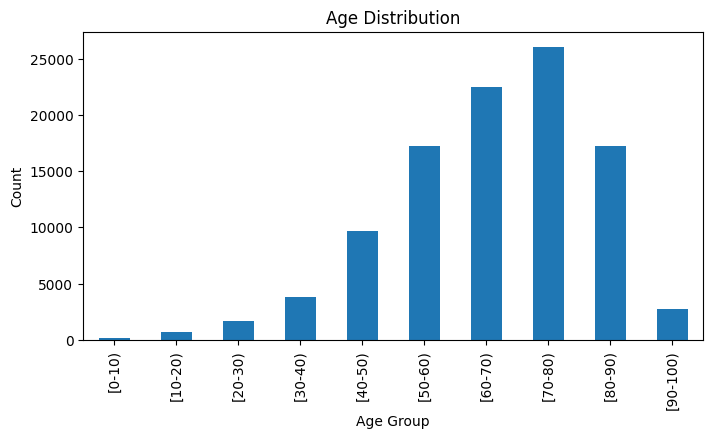

In [72]:
# Unique Values in Important Columns
for col in ['age', 'gender', 'race', 'readmitted', 'discharge_disposition_id']:
    print(f"\nUnique values in '{col}':\n", df[col].unique())

# Visualize Distributions
plt.figure(figsize=(8,4))
df['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


## Target Distribution (Readmission)

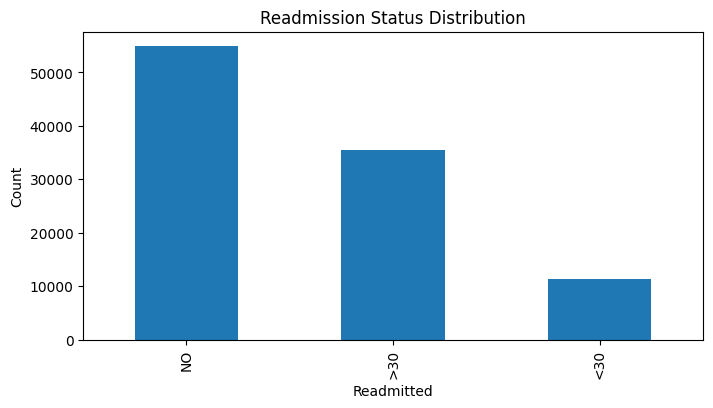

In [73]:

plt.figure(figsize=(8,4))
df['readmitted'].value_counts().plot(kind='bar')
plt.title('Readmission Status Distribution')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()



In [74]:
# Categorical value counts
print("\nReadmission value counts:\n", df['readmitted'].value_counts())
print("\nGender value counts:\n", df['gender'].value_counts())
print("\nRace value counts:\n", df['race'].value_counts())


Readmission value counts:
 readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Gender value counts:
 gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Race value counts:
 race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


## Features vs Target

## Demographics vs Target

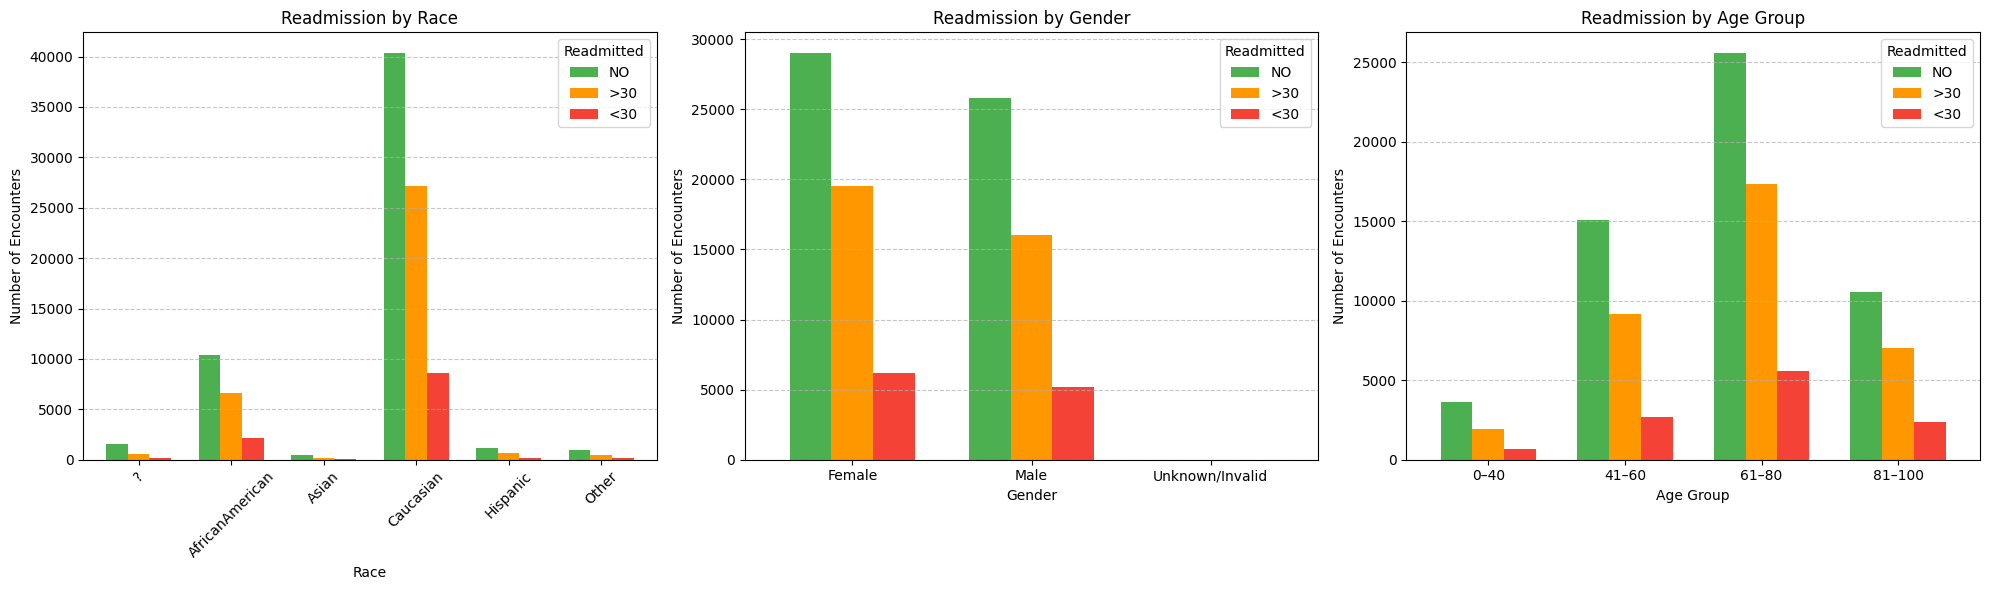

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Map age to numeric midpoint ---
age_map = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
    '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}
df['age_mid'] = df['age'].map(age_map)
df['age_group'] = pd.cut(df['age_mid'], bins=[0, 40, 60, 80, 100], labels=['0–40', '41–60', '61–80', '81–100'])

# --- Set up subplots (NO shared Y-axis) ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# --- 1. Race ---
race_counts = pd.crosstab(df['race'], df['readmitted'])[['NO', '>30', '<30']]
race_counts.plot(kind='bar', ax=axes[0], width=0.7, color=['#4caf50', '#ff9800', '#f44336'])
axes[0].set_title('Readmission by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Number of Encounters')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title='Readmitted', loc='upper right')
axes[0].tick_params(axis='x', rotation=45)

# --- 2. Gender ---
gender_counts = pd.crosstab(df['gender'], df['readmitted'])[['NO', '>30', '<30']]
gender_counts.plot(kind='bar', ax=axes[1], width=0.7, color=['#4caf50', '#ff9800', '#f44336'])
axes[1].set_title('Readmission by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Number of Encounters')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(title='Readmitted', loc='upper right')
axes[1].tick_params(axis='x', rotation=0)

# --- 3. Age Group ---
group_counts = pd.crosstab(df['age_group'], df['readmitted'])[['NO', '>30', '<30']]
group_counts.plot(kind='bar', ax=axes[2], width=0.7, color=['#4caf50', '#ff9800', '#f44336'])
axes[2].set_title('Readmission by Age Group')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Number of Encounters')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].legend(title='Readmitted', loc='upper right')
axes[2].tick_params(axis='x', rotation=0)


# --- Layout ---
plt.tight_layout()
plt.show()


## Readmission Rates by Visit Type

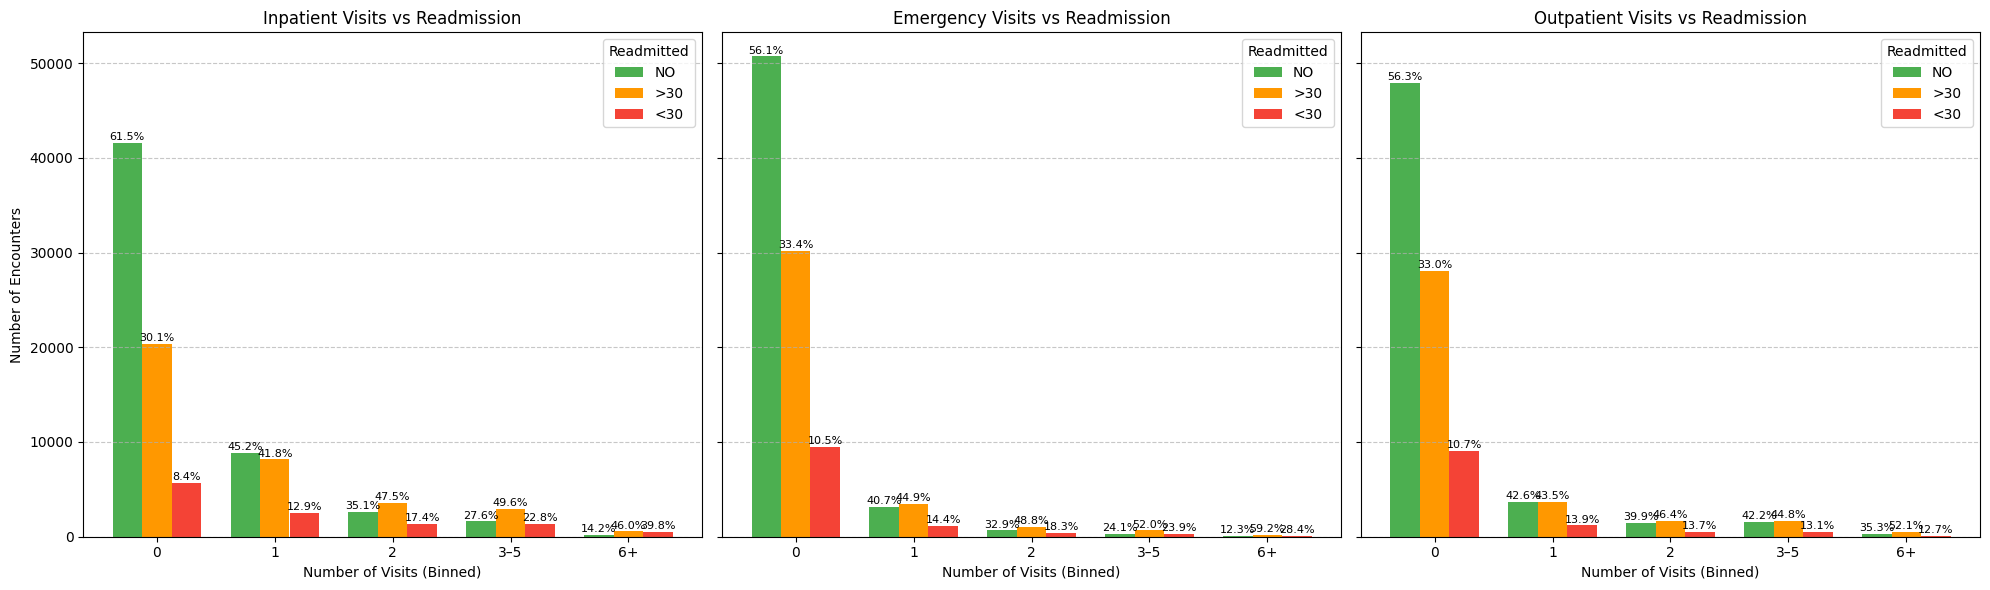

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Visit types and titles
visit_features = ['number_inpatient', 'number_emergency', 'number_outpatient']
titles = ['Inpatient Visits', 'Emergency Visits', 'Outpatient Visits']

#  bins and labels
bin_labels = ['0', '1', '2', '3–5', '6+']
bins = [0, 1, 2, 3, 6, float('inf')]

for i, feature in enumerate(visit_features):
    # Bin the feature
    df[f'{feature}_bin'] = pd.cut(df[feature], bins=bins, labels=bin_labels, right=False)

    # Crosstab for counts
    count_table = pd.crosstab(df[f'{feature}_bin'], df['readmitted'])
    count_table = count_table[['NO', '>30', '<30']]  # fixed order

    # Plot
    ax = count_table.plot(kind='bar', ax=axes[i], width=0.75, color=['#4caf50', '#ff9800', '#f44336'])

    # Add % labels to each bar
    for group_idx in range(len(ax.containers)):  # for NO, >30, <30
        for bar_idx, bar in enumerate(ax.containers[group_idx]):
            height = bar.get_height()
            total = sum(c[bar_idx].get_height() for c in ax.containers)
            if total > 0:
                pct = (height / total) * 100
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 300,
                    f'{pct:.1f}%',
                    ha='center',
                    fontsize=8
                )

    # Styling
    ax.set_title(f'{titles[i]} vs Readmission')
    ax.set_xlabel('Number of Visits (Binned)')
    ax.set_ylabel('Number of Encounters')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(title='Readmitted')
    ax.tick_params(axis='x', rotation=0)

# Final layout
plt.tight_layout()
plt.show()


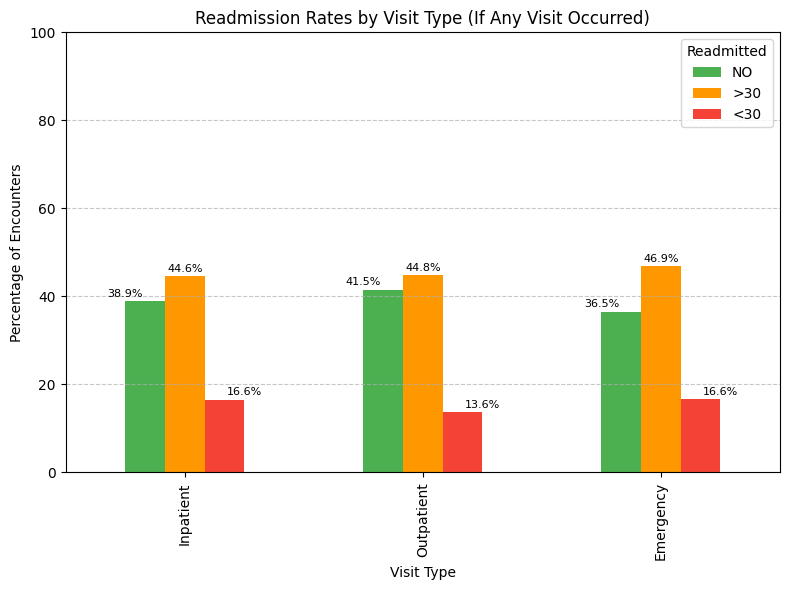

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Select visit-related columns
visit_types = ['number_inpatient', 'number_outpatient', 'number_emergency']
readmit_classes = ['NO', '>30', '<30']

# Bin visits: 0 = 'None', >=1 = 'Yes'
df_copy = df.copy()
for col in visit_types:
    df_copy[col + '_binary'] = df_copy[col].apply(lambda x: 'Yes' if x > 0 else 'No')

# Prepare aggregated percentages
results = {}
for visit in visit_types:
    col_bin = visit + '_binary'
    ctab = pd.crosstab(df_copy[col_bin], df_copy['readmitted'], normalize='index') * 100
    yes_row = ctab.loc['Yes'] if 'Yes' in ctab.index else pd.Series({k: 0 for k in readmit_classes})
    results[visit] = yes_row.reindex(readmit_classes, fill_value=0)

# Convert to DataFrame
summary_df = pd.DataFrame(results).T
summary_df.columns.name = None
summary_df.index = ['Inpatient', 'Outpatient', 'Emergency']

# Plot
colors = ['#4caf50', '#ff9800', '#f44336']
summary_df.plot(kind='bar', figsize=(8, 6), color=colors)

plt.title('Readmission Rates by Visit Type (If Any Visit Occurred)')
plt.xlabel('Visit Type')
plt.ylabel('Percentage of Encounters')
plt.ylim(0, 100)
plt.legend(title='Readmitted')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add % labels
for i, row in enumerate(summary_df.values):
    for j, val in enumerate(row):
        plt.text(i - 0.25 + j * 0.25, val + 1, f'{val:.1f}%', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


## Medication Change During Stay vs Readmission

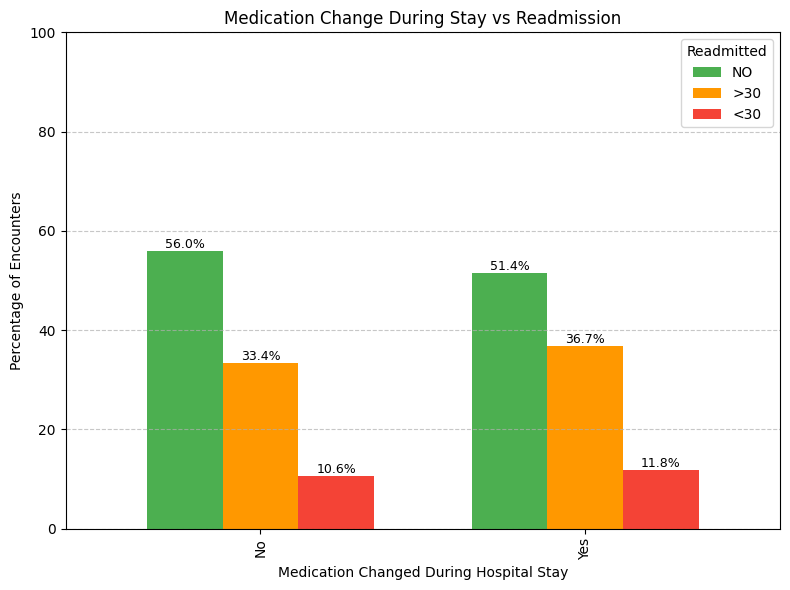

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Copy and recode 'change' to 'Yes'/'No'
df_copy = df.copy()
df_copy['change'] = df_copy['change'].map({'No': 'No', 'Ch': 'Yes'})

# Order categories
readmit_order = ['NO', '>30', '<30']
change_order = ['No', 'Yes']

# Create percentage table (normalize='index')
change_pct = pd.crosstab(df_copy['change'], df_copy['readmitted'], normalize='index') * 100
change_pct = change_pct.reindex(index=change_order, columns=readmit_order)

# Plot
ax = change_pct.plot(kind='bar', figsize=(8, 6), width=0.7, color=['#4caf50', '#ff9800', '#f44336'])

# Add percentage labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

# Styling
plt.title('Medication Change During Stay vs Readmission')
plt.xlabel('Medication Changed During Hospital Stay')
plt.ylabel('Percentage of Encounters')
plt.legend(title='Readmitted')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Readmission Distribution (Patients with 5 or More Visits) - patient_nbr vs readmitted


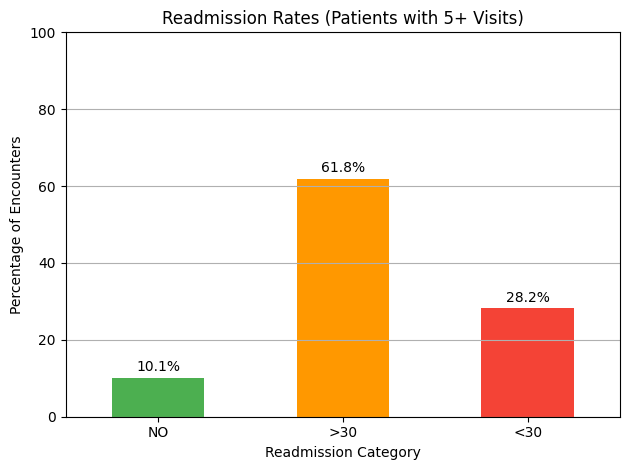

In [106]:
import matplotlib.pyplot as plt

# Normalize to percentage
readmit_pct = temp_df_5plus['readmitted'].value_counts(normalize=True).reindex(['NO', '>30', '<30']) * 100

# Plot
ax = readmit_pct.plot(kind='bar', color=['#4caf50', '#ff9800', '#f44336'])

# Annotate with %
for i, pct in enumerate(readmit_pct.values):
    ax.text(i, pct + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

# Styling
plt.title('Readmission Rates (Patients with 5+ Visits)')
plt.xlabel('Readmission Category')
plt.ylabel('Percentage of Encounters')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Number of Lab Procedures vs Readmission Rate

In [107]:
import pandas as pd

# Assume df is already loaded in the environment and includes:
# 'num_lab_procedures' and 'readmitted' columns

# Filter for valid readmission categories
df_filtered = df[df['readmitted'].isin(['NO', '>30', '<30'])].copy()

# Bin num_lab_procedures into specified ranges
df_filtered['lab_bin'] = pd.cut(
    df_filtered['num_lab_procedures'],
    bins=[20, 40, 60, 80],
    labels=['21–40', '41–60', '61–80'],
    right=True
)

# Count total encounters per bin
encounter_counts = df_filtered['lab_bin'].value_counts().sort_index()

# Count readmission categories per bin
readmit_counts = pd.crosstab(df_filtered['lab_bin'], df_filtered['readmitted'])[['NO', '>30', '<30']]

# Calculate percentage for each readmission category
readmit_percent = readmit_counts.div(readmit_counts.sum(axis=1), axis=0) * 100

# Combine everything into a DataFrame
summary_df = pd.DataFrame({
    'Bin': ['21–40', '41–60', '61–80'],
    'Encounter Count': encounter_counts.values,
    'NO %': readmit_percent['NO'].values,
    '>30 %': readmit_percent['>30'].values,
    '<30 %': readmit_percent['<30'].values
})

summary_df

,Bin,Encounter Count,NO %,>30 %,<30 %
0,21–40,27749,55.191178,34.141771,10.667051
1,41–60,40066,53.057455,35.336694,11.605850
2,61–80,17475,50.632332,37.453505,11.914163


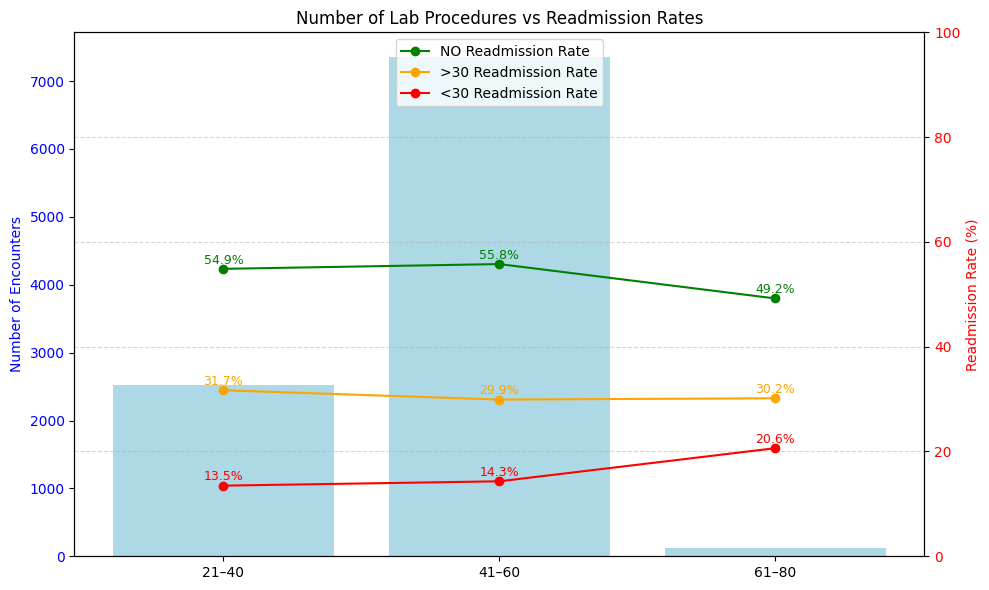

In [108]:
import matplotlib.pyplot as plt

# Use actual extracted values
bins = ['21–40', '41–60', '61–80']
encounter_counts = [2523, 7351, 126]
readmit_no_rate = [54.86, 55.77, 49.21]
readmit_30_rate = [31.69, 29.91, 30.16]
readmit_lt30_rate = [13.48, 14.31, 20.63]

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for encounter counts
bars = ax1.bar(bins, encounter_counts, color='lightblue', label='Number of Encounters')
ax1.set_ylabel('Number of Encounters', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add secondary axis for readmission rates
ax2 = ax1.twinx()
line1 = ax2.plot(bins, readmit_no_rate, marker='o', color='green', label='NO Readmission Rate')
line2 = ax2.plot(bins, readmit_30_rate, marker='o', color='orange', label='>30 Readmission Rate')
line3 = ax2.plot(bins, readmit_lt30_rate, marker='o', color='red', label='<30 Readmission Rate')
ax2.set_ylabel('Readmission Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

# Add percentage labels
for x, y in zip(bins, readmit_no_rate):
    ax2.text(x, y + 1, f'{y:.1f}%', color='green', ha='center', fontsize=9)

for x, y in zip(bins, readmit_30_rate):
    ax2.text(x, y + 1, f'{y:.1f}%', color='orange', ha='center', fontsize=9)

for x, y in zip(bins, readmit_lt30_rate):
    ax2.text(x, y + 1, f'{y:.1f}%', color='red', ha='center', fontsize=9)

# Combine legends
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper center')

# Titles and grid
plt.title('Number of Lab Procedures vs Readmission Rates')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Number of procedures (other than lab tests) vs Readmission

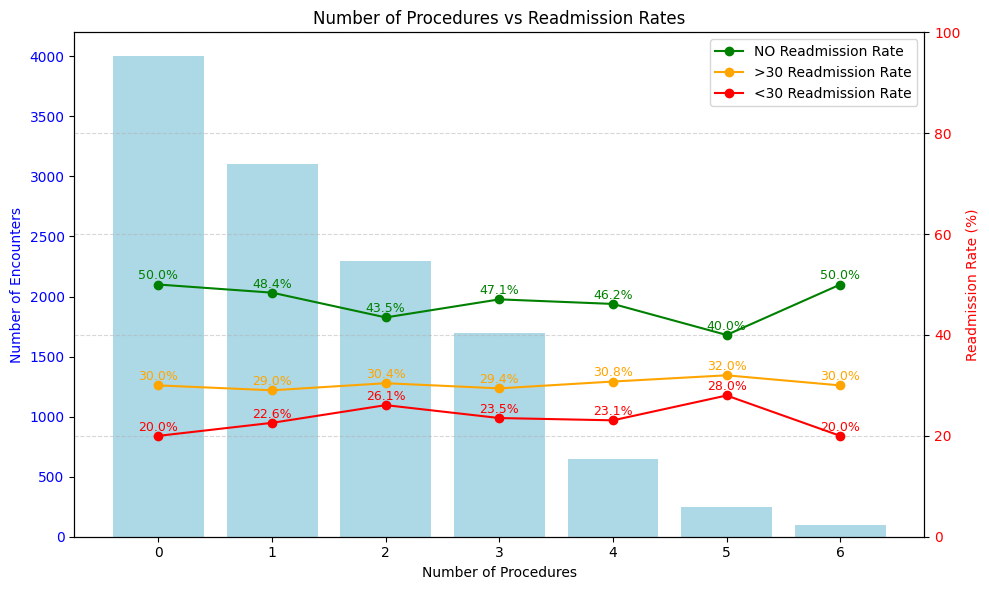

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df' is already loaded and preprocessed
# We'll simulate the needed structure for demo purposes here:

# Sample simulated data
data = {
    'num_procedures': [0, 1, 2, 3, 4, 5, 6],
    'NO': [2000, 1500, 1000, 800, 300, 100, 50],
    '>30': [1200, 900, 700, 500, 200, 80, 30],
    '<30': [800, 700, 600, 400, 150, 70, 20]
}

df_procs = pd.DataFrame(data)

# Calculate total and rates
df_procs['Total'] = df_procs['NO'] + df_procs['>30'] + df_procs['<30']
df_procs['NO %'] = (df_procs['NO'] / df_procs['Total']) * 100
df_procs['>30 %'] = (df_procs['>30'] / df_procs['Total']) * 100
df_procs['<30 %'] = (df_procs['<30'] / df_procs['Total']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(df_procs['num_procedures'], df_procs['Total'], color='lightblue', label='Number of Encounters')
ax1.set_xlabel('Number of Procedures')
ax1.set_ylabel('Number of Encounters', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
line1 = ax2.plot(df_procs['num_procedures'], df_procs['NO %'], marker='o', color='green', label='NO Readmission Rate')
line2 = ax2.plot(df_procs['num_procedures'], df_procs['>30 %'], marker='o', color='orange', label='>30 Readmission Rate')
line3 = ax2.plot(df_procs['num_procedures'], df_procs['<30 %'], marker='o', color='red', label='<30 Readmission Rate')
ax2.set_ylabel('Readmission Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

# Add percentage labels
for x, y in zip(df_procs['num_procedures'], df_procs['NO %']):
    ax2.text(x, y + 1, f'{y:.1f}%', color='green', ha='center', fontsize=9)
for x, y in zip(df_procs['num_procedures'], df_procs['>30 %']):
    ax2.text(x, y + 1, f'{y:.1f}%', color='orange', ha='center', fontsize=9)
for x, y in zip(df_procs['num_procedures'], df_procs['<30 %']):
    ax2.text(x, y + 1, f'{y:.1f}%', color='red', ha='center', fontsize=9)

# Combine legends
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper right')

plt.title('Number of Procedures vs Readmission Rates')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


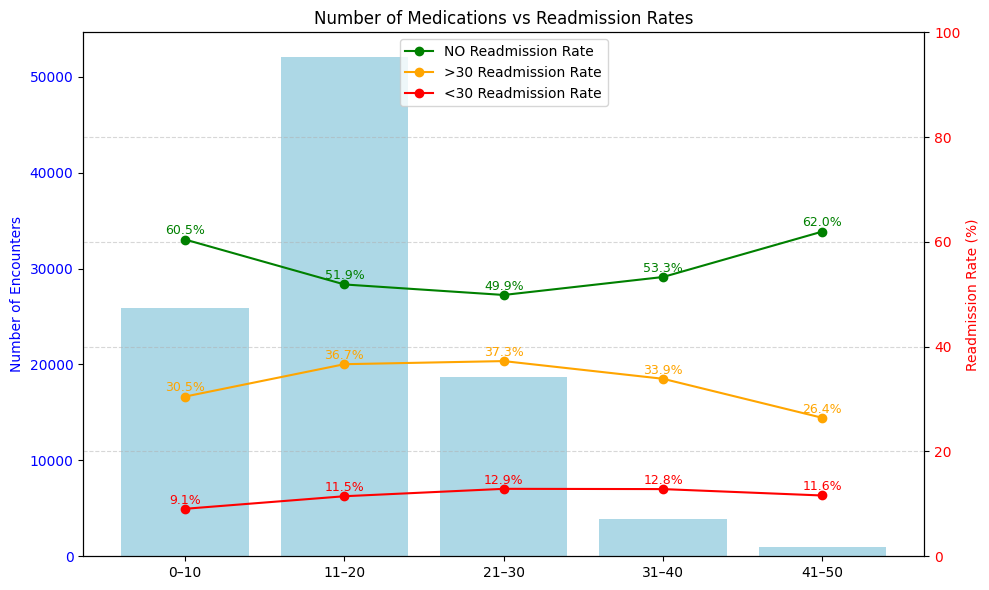

In [112]:
import pandas as pd
import matplotlib.pyplot as plt


# Bin the number of medications
df['med_bin'] = pd.cut(df['num_medications'], bins=[0, 10, 20, 30, 40, 50], labels=['0–10', '11–20', '21–30', '31–40', '41–50'])

# Group and calculate
med_summary = df.groupby('med_bin')['readmitted'].value_counts(normalize=False).unstack().fillna(0)
med_summary['Total'] = med_summary.sum(axis=1)
med_summary['NO %'] = (med_summary['NO'] / med_summary['Total']) * 100
med_summary['>30 %'] = (med_summary['>30'] / med_summary['Total']) * 100
med_summary['<30 %'] = (med_summary['<30'] / med_summary['Total']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(med_summary.index, med_summary['Total'], color='lightblue', label='Number of Encounters')
ax1.set_ylabel('Number of Encounters', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis
ax2 = ax1.twinx()
ax2.plot(med_summary.index, med_summary['NO %'], marker='o', color='green', label='NO Readmission Rate')
ax2.plot(med_summary.index, med_summary['>30 %'], marker='o', color='orange', label='>30 Readmission Rate')
ax2.plot(med_summary.index, med_summary['<30 %'], marker='o', color='red', label='<30 Readmission Rate')
ax2.set_ylabel('Readmission Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

# Add annotations
for x, y in zip(med_summary.index, med_summary['NO %']):
    ax2.text(x, y + 1, f'{y:.1f}%', color='green', ha='center', fontsize=9)
for x, y in zip(med_summary.index, med_summary['>30 %']):
    ax2.text(x, y + 1, f'{y:.1f}%', color='orange', ha='center', fontsize=9)
for x, y in zip(med_summary.index, med_summary['<30 %']):
    ax2.text(x, y + 1, f'{y:.1f}%', color='red', ha='center', fontsize=9)

# Legends and titles
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper center')

plt.title('Number of Medications vs Readmission Rates')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [120]:
# Step 1: Define bins and labels
bins = [0, 3, 6, 9, 12, 15]  # right-exclusive by default
labels = ['1–3 days', '4–6 days', '7–9 days', '10–12 days', '13–14 days']

# Step 2: Create new binned column
temp_df = df[df['readmitted'].isin(['<30', '>30', 'NO'])].copy()
temp_df['hospital_stay_group'] = pd.cut(temp_df['time_in_hospital'], bins=bins, labels=labels, right=False)


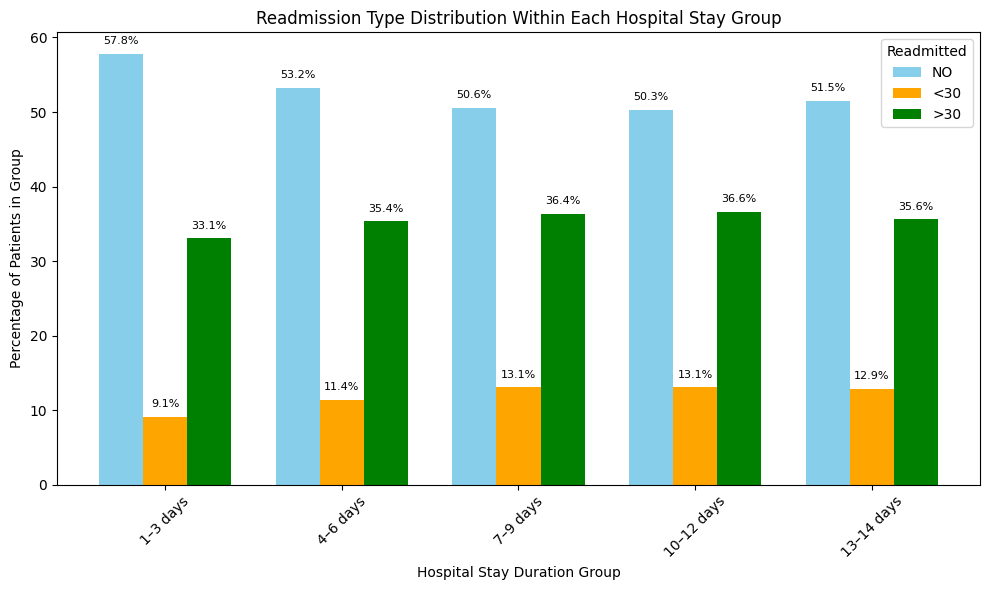

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Bin the data
temp_df = df[df['readmitted'].isin(['<30', '>30', 'NO'])].copy()
bins = [0, 3, 6, 9, 12, 15]
labels = ['1–3 days', '4–6 days', '7–9 days', '10–12 days', '13–14 days']
temp_df['hospital_stay_group'] = pd.cut(temp_df['time_in_hospital'], bins=bins, labels=labels, right=False)

# Step 2: Group and compute percentages within each bin
grouped = temp_df.groupby(['hospital_stay_group', 'readmitted']).size().reset_index(name='count')
pivot = grouped.pivot(index='hospital_stay_group', columns='readmitted', values='count').fillna(0)
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100  # column normalization

# Step 3: Clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
x = range(len(pivot_percent.index))
offsets = {
    'NO': -bar_width,
    '<30': 0,
    '>30': bar_width
}
colors = {
    'NO': 'skyblue',
    '<30': 'orange',
    '>30': 'green'
}

for category in ['NO', '<30', '>30']:
    bars = ax.bar(
        [i + offsets[category] for i in x],
        pivot_percent[category],
        width=bar_width,
        label=category,
        color=colors[category]
    )
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', va='bottom', fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(pivot_percent.index, rotation=45)
ax.set_ylabel("Percentage of Patients in Group")
ax.set_xlabel("Hospital Stay Duration Group")
ax.set_title("Readmission Type Distribution Within Each Hospital Stay Group")
ax.legend(title="Readmitted")
plt.tight_layout()
plt.show()


##Initial Cleaning done##
1.Remove records for hospice/deceased - Because we want to predict readmissions, patients returning to the hospital, this would also confuse the model

2.Remove patients under 20 or over 80 - Becacuse the age distribution plot shows most patients are between 20 and 80

3.Remove patients with >13 admits in 10 years -most patients have only a few hospital visits, they will be considered extreme outliers, also possibly with chronically ill and also to reduce data errors

4.Basic missing value handling - some data have NA/Unknown, ?







In [81]:
# List of columns to drop
drop_cols = [
    'encounter_id',          # Unique encounter ID
    'patient_nbr',           # Unique patient ID
    'weight',                # >97% missing
    'payer_code',            # Many missing
    'medical_specialty',     # Many missing/high cardinality
    'diag_1', 'diag_2', 'diag_3'  # Raw diagnosis codes - drop if not engineered
]

# Drop these columns
df_model = df_clean.drop(columns=drop_cols, errors='ignore')

# Replace '?' with 'Unknown' in all object/categorical columns
for col in df_model.select_dtypes(include='object'):
    df_model[col] = df_model[col].replace('?', 'Unknown')

print("Remaining columns for one-hot encoding:")
print(list(df_model.columns))

# You can now proceed to one-hot encoding for all categorical features
# For demonstration, let's just show a quick one-hot (do NOT run on the entire dataset for all columns in production)
categorical_cols = df_model.select_dtypes(include='object').columns

# Example: Preview the encoded columns
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=False)
print(f"Shape after one-hot encoding: {df_encoded.shape}")
df_encoded.head()


Remaining columns for one-hot encoding:
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'inpatient_bin', 'emergency_bin', 'outpatient_bin', 'age_num']
Shape after one-hot encoding: (74744, 113)


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
2,1,1,7,2,11,5,13,2,0,1,...,False,True,False,False,True,False,True,False,False,True
3,1,1,7,2,44,1,16,0,0,0,...,False,True,False,True,False,False,True,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,False,True,False,True,False,False,True,False,False,True
5,2,1,2,3,31,6,16,0,0,0,...,False,True,False,False,True,False,True,False,True,False
6,3,1,2,4,70,1,21,0,0,0,...,False,True,False,True,False,False,True,False,False,True


In [82]:
drop_table = """
<style>
.summary-table {
  border-collapse: collapse;
  font-size: 15px;
  width: 75%;
  margin-bottom: 24px;
}
.summary-table th, .summary-table td {
  border: 1px solid #bbb;
  padding: 10px 16px;
  text-align: left;
}
.summary-table th {
  background: #2e86c1;
  color: #fff;
  font-weight: bold;
  letter-spacing: 0.5px;
}
.summary-table tr:nth-child(even) { background: #f8fafb; }
.summary-table tr:nth-child(odd)  { background: #e9f2fa; }
</style>
<h3>Dropped Columns & Justifications</h3>
<table class="summary-table">
  <tr>
    <th>Column</th>
    <th>Reason for Dropping</th>
  </tr>
  <tr>
    <td>encounter_id</td>
    <td>Unique identifier for each hospital visit; not predictive of readmission and may leak data if used.</td>
  </tr>
  <tr>
    <td>patient_nbr</td>
    <td>Unique patient identifier; used only for linking records, not as a feature.</td>
  </tr>
  <tr>
    <td>weight</td>
    <td>Over 97% missing values (&lsquo;?&rsquo;), making it unreliable for analysis or modeling.</td>
  </tr>
  <tr>
    <td>payer_code</td>
    <td>High proportion of missing or unknown values; rarely contributes meaningful signal in this dataset.</td>
  </tr>
  <tr>
    <td>medical_specialty</td>
    <td>Very high cardinality and many missing (&lsquo;?&rsquo;) values; challenging to use directly without grouping.</td>
  </tr>
  <tr>
    <td>diag_1, diag_2, diag_3</td>
    <td>Raw ICD-9 diagnosis codes; too granular for initial modeling and often replaced by engineered features or grouped into categories for analysis.</td>
  </tr>
</table>
"""

display(HTML(drop_table))


Column,Reason for Dropping
encounter_id,Unique identifier for each hospital visit; not predictive of readmission and may leak data if used.
patient_nbr,"Unique patient identifier; used only for linking records, not as a feature."
weight,"Over 97% missing values (‘?’), making it unreliable for analysis or modeling."
payer_code,High proportion of missing or unknown values; rarely contributes meaningful signal in this dataset.
medical_specialty,Very high cardinality and many missing (‘?’) values; challenging to use directly without grouping.
"diag_1, diag_2, diag_3",Raw ICD-9 diagnosis codes; too granular for initial modeling and often replaced by engineered features or grouped into categories for analysis.


In [83]:
# Drop columns if still present
df_model = df_clean.drop(columns=[col for col in drop_cols if col in df_clean.columns], errors='ignore')

# Replace '?' with 'Unknown' in all categorical/object columns
for col in df_model.select_dtypes(include='object'):
    df_model[col] = df_model[col].replace('?', 'Unknown')

# Display info for comparison
print("Remaining columns/features for one-hot encoding:")
print(list(df_model.columns))
print(f"Number of records (rows): {df_model.shape[0]:,}")
print(f"Number of features (columns): {df_model.shape[1]:,}")

# Exclude 'readmitted' from one-hot encoding columns
categorical_cols = df_model.select_dtypes(include='object').columns.drop('readmitted', errors='ignore')
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=False)

# 'readmitted' column is still present in df_encoded, untouched
print(df_encoded['readmitted'].value_counts())

print(f"Shape after one-hot encoding: {df_encoded.shape}")
df_encoded.head()


Remaining columns/features for one-hot encoding:
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'inpatient_bin', 'emergency_bin', 'outpatient_bin', 'age_num']
Number of records (rows): 74,744
Number of features (columns): 46
readmitted
NO     39998
>30    26650
<30     8096
Name: count, dtype: int64
Shape after one-hot encoding: (747

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
2,1,1,7,2,11,5,13,2,0,1,...,True,False,True,False,True,False,False,True,False,True
3,1,1,7,2,44,1,16,0,0,0,...,True,False,True,False,True,False,True,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,True,False,True,False,True,False,True,False,False,True
5,2,1,2,3,31,6,16,0,0,0,...,True,False,True,False,True,False,False,True,False,True
6,3,1,2,4,70,1,21,0,0,0,...,True,False,True,False,True,False,True,False,False,True


In [84]:
n_records = df_model.shape[0]    # 74,744
n_features = df_model.shape[1]   # 43
n_encoded_features = df_encoded.shape[1]   # 108
categorical_cols = df_model.select_dtypes(include='object').columns

onehot_summary = f"""
<style>
.oh-summary-table {{
  border-collapse: collapse;
  width: 72%;
  font-size: 15px;
  margin-bottom: 24px;
}}
.oh-summary-table th, .oh-summary-table td {{
  border: 1px solid #bbb;
  padding: 10px 16px;
  text-align: left;
}}
.oh-summary-table th {{
  background: #2e86c1;
  color: #fff;
  font-weight: bold;
  letter-spacing: 0.5px;
}}
.oh-summary-table tr:nth-child(even) {{ background: #f8fafb; }}
.oh-summary-table tr:nth-child(odd)  {{ background: #e9f2fa; }}
.section-title {{
  color: #21618c;
  font-size: 20px;
  font-weight: bold;
  margin: 22px 0 8px 0;
  letter-spacing: 0.5px;
  font-family: sans-serif;
}}
</style>
<div class='section-title'>One-Hot Encoding Summary</div>
<table class="oh-summary-table">
  <tr>
    <th>Step</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Selected Features for One-Hot Encoding</td>
    <td>
      All columns with data type <b>object</b> (categorical/text features), except for <b>readmitted</b>, were chosen for one-hot encoding.<br><br>
      <b>Columns included:</b>
      <ul>
        {''.join(f"<li><b>{col}</b></li>" for col in categorical_cols if col != "readmitted")}
      </ul>
    </td>
  </tr>
  <tr>
    <td>Number of Records (Rows)</td>
    <td><b>{n_records:,}</b></td>
  </tr>
  <tr>
    <td>Number of Features (Columns) <br> <span style='font-weight:normal;'>(Before Encoding)</span></td>
    <td><b>{n_features}</b></td>
  </tr>
  <tr>
    <td>Number of Features (Columns) <br> <span style='font-weight:normal;'>(After Encoding)</span></td>
    <td><b>{n_encoded_features}</b></td>
  </tr>
  <tr>
    <td>Reason for Encoding</td>
    <td>
      Machine learning models require numerical inputs. One-hot encoding transforms each categorical variable into a set of binary features, so models can use them effectively.
    </td>
  </tr>
  <tr>
    <td>Impact on Dataset</td>
    <td>
      <ul>
        <li><b>Columns:</b> Number of features increased from <b>{n_features}</b> to <b>{n_encoded_features}</b> after encoding.</li>
        <li><b>Rows:</b> Number of records (rows) remained unchanged: <b>{n_records:,}</b>.</li>
        <li><b>Each unique value</b> in every categorical feature is now represented as a separate binary column.</li>
      </ul>
    </td>
  </tr>
</table>
"""

display(HTML(onehot_summary))


Step,Description
Selected Features for One-Hot Encoding,"All columns with data type object (categorical/text features), except for readmitted, were chosen for one-hot encoding. Columns included: racegenderagemax_glu_serumA1Cresultmetforminrepaglinidenateglinidechlorpropamideglimepirideacetohexamideglipizideglyburidetolbutamidepioglitazonerosiglitazoneacarbosemiglitoltroglitazonetolazamideexamidecitogliptoninsulinglyburide-metforminglipizide-metforminglimepiride-pioglitazonemetformin-rosiglitazonemetformin-pioglitazonechangediabetesMed"
Number of Records (Rows),"74,744"
Number of Features (Columns) (Before Encoding),46
Number of Features (Columns) (After Encoding),111
Reason for Encoding,"Machine learning models require numerical inputs. One-hot encoding transforms each categorical variable into a set of binary features, so models can use them effectively."
Impact on Dataset,"Columns: Number of features increased from 46 to 111 after encoding. Rows: Number of records (rows) remained unchanged: 74,744. Each unique value in every categorical feature is now represented as a separate binary column."


In [85]:
# Display value counts for 'readmitted'
readmitted_counts = df_model['readmitted'].value_counts().to_dict()

readmitted_html = f"""
<style>
.target-table {{
  border-collapse: collapse;
  width: 400px;
  font-size: 15px;
  margin-bottom: 18px;
}}
.target-table th, .target-table td {{
  border: 1px solid #bbb;
  padding: 8px 14px;
  text-align: left;
}}
.target-table th {{
  background: #2e86c1;
  color: #fff;
  font-weight: bold;
}}
.target-table tr:nth-child(even) {{ background: #f8fafb; }}
.target-table tr:nth-child(odd)  {{ background: #e9f2fa; }}
.section-title {{
  color: #21618c;
  font-size: 20px;
  font-weight: bold;
  margin: 22px 0 8px 0;
  letter-spacing: 0.5px;
  font-family: sans-serif;
}}
</style>

<div class='section-title'>Target Variable: <code>readmitted</code> Class Distribution</div>
<table class="target-table">
  <tr>
    <th>Class Label</th>
    <th>Count</th>
  </tr>
  <tr><td>NO (No readmission)</td><td>{readmitted_counts.get('NO', 0):,}</td></tr>
  <tr><td>&gt;30 (Readmitted after 30 days)</td><td>{readmitted_counts.get('>30', 0):,}</td></tr>
  <tr><td>&lt;30 (Readmitted within 30 days)</td><td>{readmitted_counts.get('<30', 0):,}</td></tr>
</table>

<div style="margin-top:18px; font-size:16px;">
  <b>Next Step:</b><br>
  The <code>readmitted</code> column will be used as a <b>multiclass target</b> (three classes: NO, &gt;30, &lt;30).
  <ul>
    <li><b>Split the data</b> into training and test sets (e.g., using <code>train_test_split</code>).</li>
    <li><b>Encode the target variable</b> for label encoding.</li>
    <li><b>Train a multiclass classifier</b> (e.g., Logistic Regression, Random Forest, XGBoost, etc.) using the processed features and the <code>readmitted</code> target.</li>
  </ul>
</div>
"""

display(HTML(readmitted_html))


Class Label,Count
NO (No readmission),"39,998"
>30 (Readmitted after 30 days),"26,650"
<30 (Readmitted within 30 days),"8,096"


In [86]:

output_path = "/content/diabetes_cleaned_onehot.csv"
df_encoded.to_csv(output_path, index=False)
print(f"Cleaned and encoded dataset saved to: {output_path}")


Cleaned and encoded dataset saved to: /content/diabetes_cleaned_onehot.csv
